In [1]:
import edoxrd as xrd
import peakutils as pk
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed

%matplotlib inline 

In [2]:
# generate 2theta values
xdata = np.linspace(40,50,1000)

# Define constants
wave = 1.5406
mu = 4e4
param, pos = xrd.mat_dict()

In [3]:
print(param['KTO'])
print(param['PTO'])

[3.989 3.989 3.989]
[3.905 3.905 4.14 ]


In [4]:
print(pos['KTO'])
print(pos['PTO'])

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]]


In [5]:
# Define input params
sub = 'KTO'
film = 'PTO'
Nsub = 1e4
Nfilm = 100
scale = 1e2

c_film = 3.9 # override PTO c parameter

a_sub, b_sub, c_sub = param[sub][0], param[sub][1], param[sub][2]
a_film, b_film = param[film][0], param[film][1]

# Thickness
t = (Nsub*c_sub + Nfilm*c_film)

In [6]:
# Transform to q values
q = xrd.tt2q(xdata)

/users/zatterin/Envs/py3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


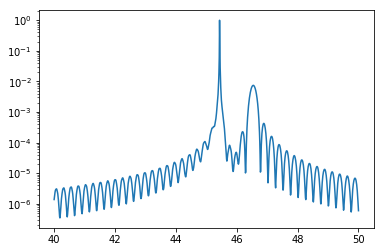

In [7]:
mats = [sub, film]

# Calc Str Fac for each material unit cell
F = {}
for material in mats:
    F[material] = xrd.calc_str_fac(material, xdata)

# Load lattice fun dictionary
L = {sub:0, film:0}

# Calc lattice fun for sub
for l in range(0,int(Nsub)):
    L[sub] += np.exp(1j*q*l*c_sub)*np.exp(-l*4e-4) # CRUCIAL BIT THAT NEEDS TO BE LOOKED AT
    
for l in range(0, int(Nfilm)):
    L[film] += np.exp(1j*q*l*c_film)*np.exp(-l*4e-4)
    
# Calc the total scatt amplitude
A = 0
for material in mats:
    A += F[material]*L[material]

# Normalisation and Intensity
A = A / A.max()
I =  A * np.conj(A)

# Plot
plt.plot(xdata, I)
plt.yscale('log')

The lattice sum in the above cannot be quite right. Must modify the damping factor, and does the sum change as you add more layers to the system?